## Water Quality Prediction


## Importing required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import AdaBoostClassifier
from imblearn.over_sampling import SMOTE
import seaborn as sn
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings("ignore")


## Elementary Data Analysis

In [ ]:
water_quality_data = pd.read_csv('waterQuality1.csv', na_values='#NUM!')

In [ ]:
water_quality_data

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1.0
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1.0
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0.0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1.0
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,0.05,7.78,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,...,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03,1.0
7995,0.05,24.22,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,...,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08,1.0
7996,0.09,6.85,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,...,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05,1.0
7997,0.01,10.00,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,...,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,1.0


In [ ]:
print('Total number of samples: ', len(water_quality_data))

Total number of samples:  7999


In [ ]:
print('Number of features: ', len(water_quality_data.columns)-1)

Number of features:  20


In [ ]:
water_quality_data.isna().any()

aluminium      False
ammonia         True
arsenic        False
barium         False
cadmium        False
chloramine     False
chromium       False
copper         False
flouride       False
bacteria       False
viruses        False
lead           False
nitrates       False
nitrites       False
mercury        False
perchlorate    False
radium         False
selenium       False
silver         False
uranium        False
is_safe         True
dtype: bool

<Axes: >

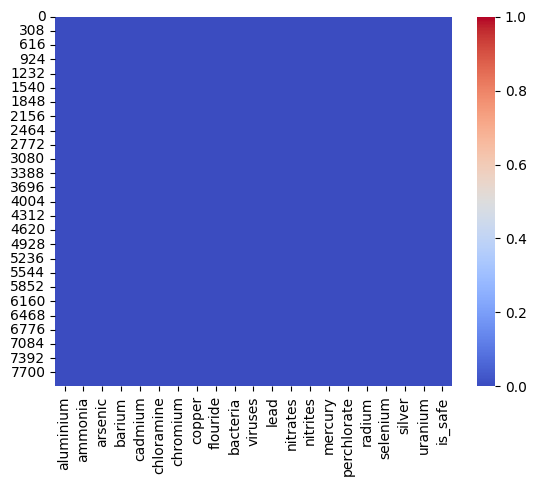

In [ ]:
sn.heatmap(water_quality_data.isna(), cmap='coolwarm')

In [ ]:
water_quality_data.dropna(inplace=True)

In [ ]:
print('Total number of samples after dropping NaN values: ', len(water_quality_data))


Total number of samples after dropping NaN values:  7996


In [ ]:
water_quality_data.describe()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
count,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,...,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000
mean,0.666396,14.278212,0.161477,1.567928,0.042803,2.177589,0.247300,0.805940,0.771646,0.319714,...,0.099431,9.819250,1.329846,0.005193,16.465266,2.920106,0.049684,0.147811,0.044672,0.114057
std,1.265323,8.878930,0.252632,1.216227,0.036049,2.567210,0.270663,0.653595,0.435423,0.329497,...,0.058169,5.541977,0.573271,0.002967,17.688827,2.322805,0.028773,0.143569,0.026906,0.317900
min,0.000000,-0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,6.577500,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.407500,0.000000,...,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000,0.000000
50%,0.070000,14.130000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,...,0.102000,9.930000,1.420000,0.005000,7.745000,2.410000,0.050000,0.080000,0.050000,0.000000
75%,0.280000,22.132500,0.100000,2.482500,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,...,0.151000,14.610000,1.760000,0.008000,29.487500,4.670000,0.070000,0.240000,0.070000,0.000000
max,5.050000,29.840000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,...,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000,1.000000


### Distribution of features

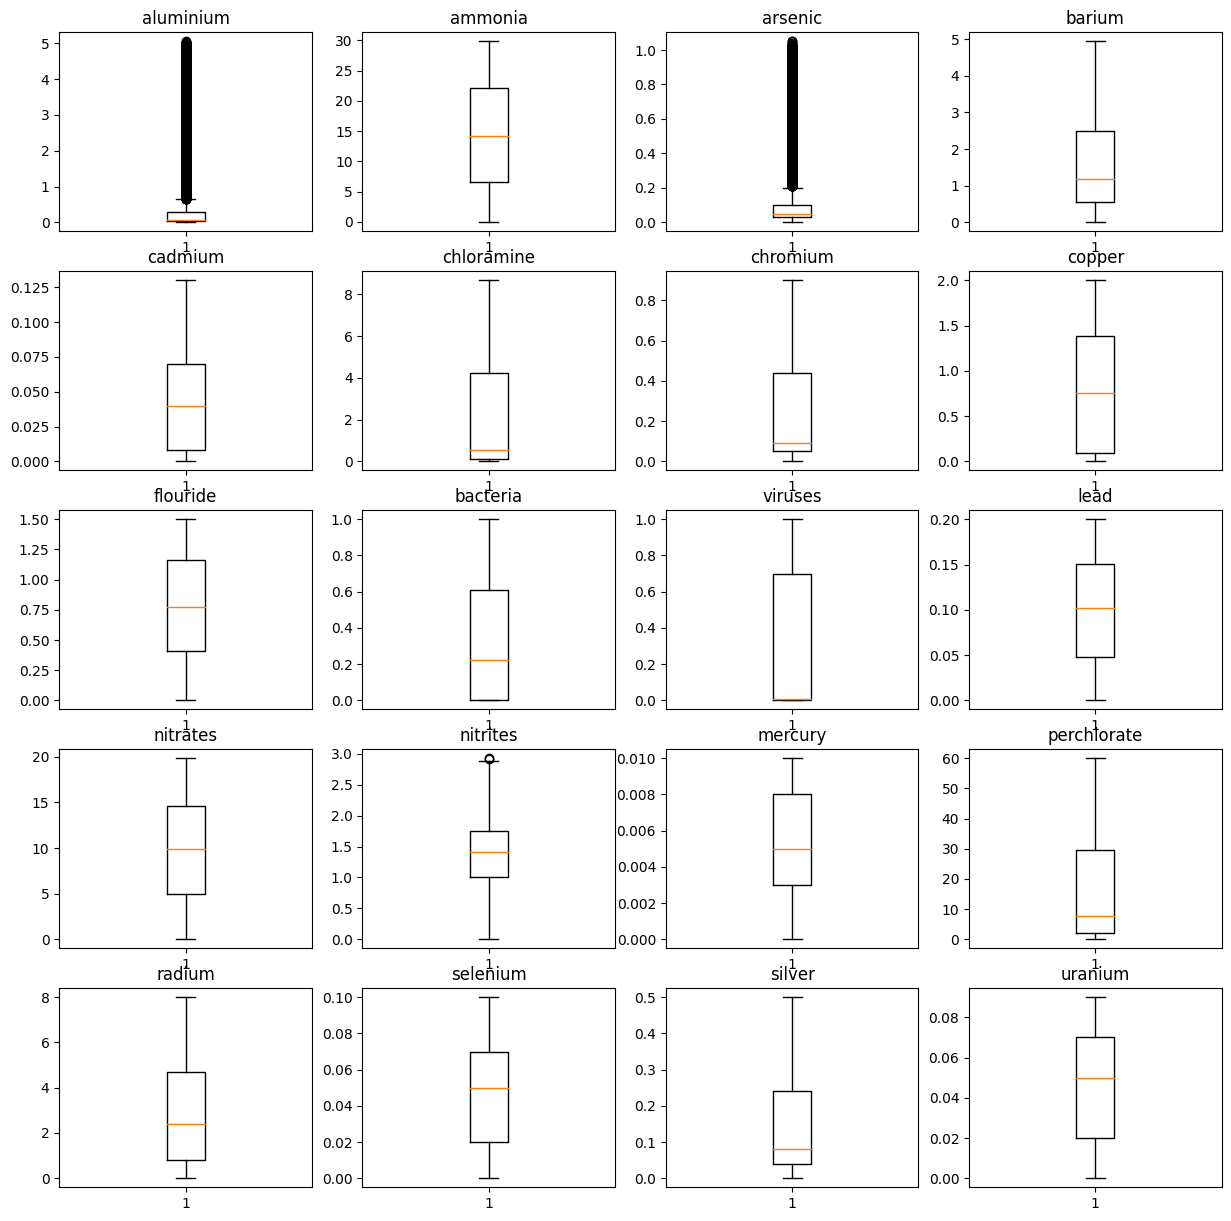

In [ ]:
plt.figure(figsize=(15,15))
columns = list(water_quality_data.columns[:-1])
for i in range(0, len(columns)):
  plt.subplot(5,4,i+1)
  plt.boxplot(water_quality_data[columns[i]])
  plt.title(columns[i])
plt.show()

### Distribution of Labels

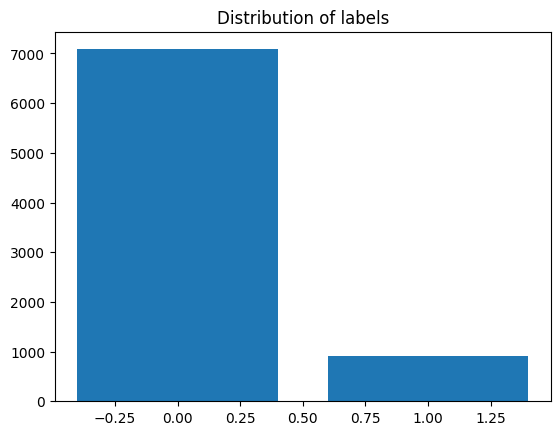

In [ ]:
water_quality_data['is_safe'] = water_quality_data['is_safe'].astype('int64')
unique_labels = water_quality_data['is_safe'].value_counts()

plt.bar(list(unique_labels.index), unique_labels.values)
plt.title('Distribution of labels')
plt.show()

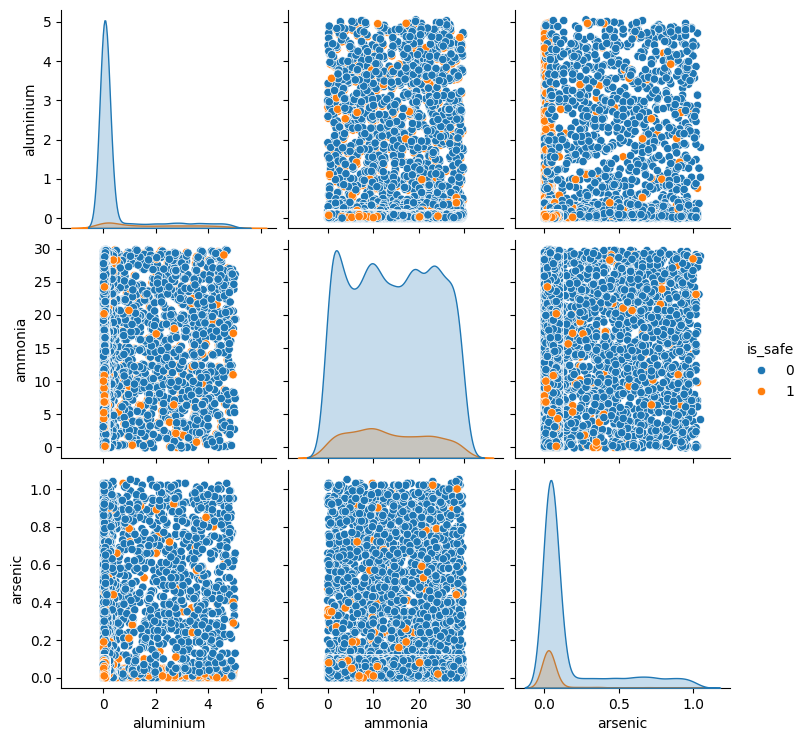

In [ ]:
sn.pairplot(data=water_quality_data, vars=columns[:3], hue='is_safe')
plt.show()

In [ ]:
unique_labels.index

Index([0, 1], dtype='int64', name='is_safe')

### Normalization

1. MinMax Normalization
2. Z-Score

In [ ]:
# Min Max Norm
min_max = MinMaxScaler()
water_quality_data_mm = water_quality_data.copy()
water_quality_data_mm[columns] = min_max.fit_transform(water_quality_data_mm[columns])

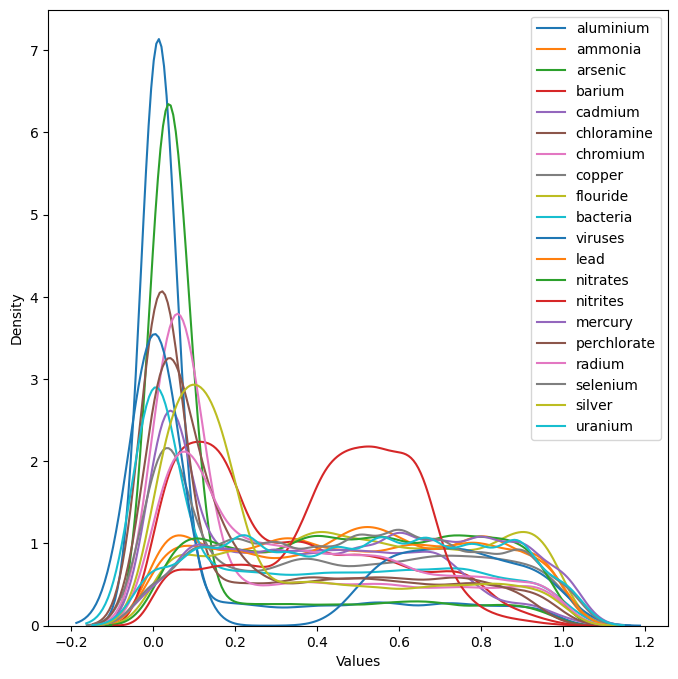

In [ ]:
plt.figure(figsize=(8,8))
for cols in water_quality_data_mm.columns[:-1]:
  sn.kdeplot(water_quality_data_mm[cols])
  plt.legend(water_quality_data_mm.columns)
  plt.xlabel('Values')
plt.show()

In [ ]:
# Z-Score Norm
z_score = StandardScaler()
water_quality_data_z = water_quality_data.copy()
water_quality_data_z[columns] = z_score.fit_transform(water_quality_data_z[columns])

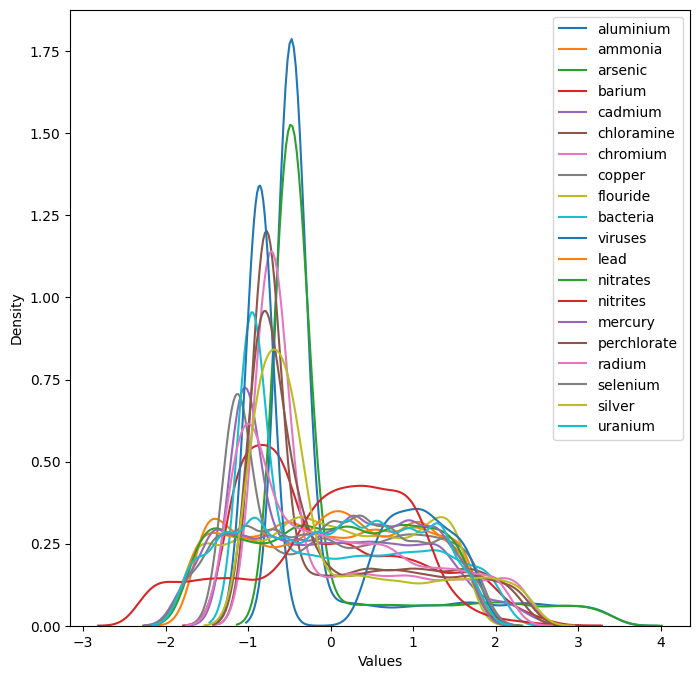

In [ ]:
plt.figure(figsize=(8,8))
for cols in water_quality_data_z.columns[:-1]:
  sn.kdeplot(water_quality_data_z[cols])
  plt.legend(water_quality_data_z.columns)
  plt.xlabel('Values')
plt.show()

# Model

1. SVM
      - SVM with MinMax Norm
      - SVM with Z-Score

2. Adaboost
      - Adaboost with MinMax Norm
      - Adaboost with Z-Score

3. KNN
      - KNN with MinMax Norm
      - KNN with Z-Score

4. Random forest with gridsearch CV
      - Random forest with gridsearch CV with MinMax Norm
      -
5. Decision Tree
    - Decision Tree with MinMax Norm
    - Decision Tree with Z-Score
6. Bagging along with Random Forest
    - Bagging along with Random Forest with MinMax Norm
    - Bagging along with Random Forest with Z-Score
7. Logistic Regression
    - Logistic Regression with MinMax Norm
    - Logistic Regression with Z-Score
    - Logistic Regression with Grid Search CV
    - Weighted Logistic Regression
8. Gradient Boosting
    - Gradient Boosting with MinMax Norm
    - Gradient Boosting with Z-Score
    - Gradient Boosting with Grid Search CV


### Defining Metrics Calculation / Splitting Data

In [ ]:
# Function to split data

def split_data(data, columns):
  features = data[columns]
  labels = data['is_safe']
  X_train, X_test, y_train, y_test = train_test_split(features, labels, random_state=42, test_size=0.3)
  return X_train, X_test, y_train, y_test

In [ ]:
def print_metrics(model_name, scaler, y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy of {} with {}: {} ({:.2%})".format(model_name, scaler, accuracy, accuracy))
    print()
    print("Error rate: {} ({:.2%})".format(1-accuracy, 1-accuracy))
    print()
    print(classification_report(y_test, y_pred))
    print_confusion_matrix(y_test, y_pred)
    roc_cur(y_test, y_pred)

In [ ]:
def print_confusion_matrix(y_test, y_pred):
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
    sn.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

In [ ]:
def roc_cur(y_test, y_pred):
  fp, tp, thresh = metrics.roc_curve(y_test, y_pred)
  curve = metrics.auc(fp, tp)
  plt.plot(fp, tp)
  plt.plot([0,1], [1,0], 'k--')
  plt.xlabel('False Postive')
  plt.ylabel('True Postive')
  plt.legend(loc='lower right')

## Support Vector Machine (SVM)

### SVM with MinMax Norm

In [ ]:
# SVM Classifier with MinMax
svm = SVC(kernel='rbf')

In [ ]:
X_train, X_test, y_train, y_test = split_data(water_quality_data_mm, columns)

In [ ]:
svm.fit(X_train, y_train)

SVC()

In [ ]:
y_pred = svm.predict(X_test)

Accuracy of SVM with MinMax normalization: 0.9278866194247604 (92.79%)

Error rate: 0.07211338057523964 (7.21%)

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      2091
           1       0.91      0.49      0.63       308

    accuracy                           0.93      2399
   macro avg       0.92      0.74      0.80      2399
weighted avg       0.93      0.93      0.92      2399



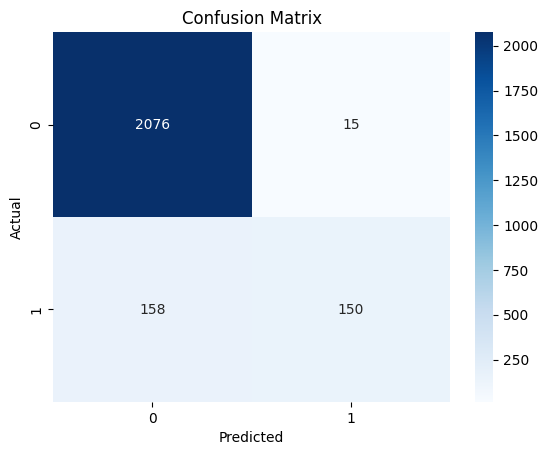

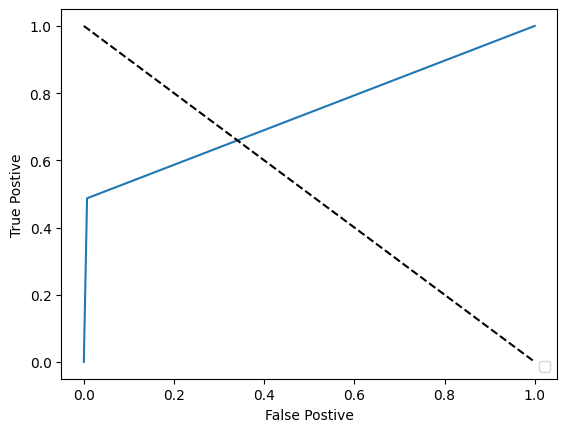

In [ ]:
print_metrics("SVM", "MinMax normalization", y_test, y_pred)

### SVM with Z-Score

In [ ]:
# SVM Classifier with Z-score
svm = SVC(kernel='rbf')

In [ ]:
X_train, X_test, y_train, y_test = split_data(water_quality_data_z, columns)

In [ ]:
svm.fit(X_train, y_train)

SVC()

In [ ]:
y_pred_2 = svm.predict(X_test)

Accuracy of SVM with Z-Score normalization: 0.9308045018757816 (93.08%)

Error rate: 0.06919549812421844 (6.92%)

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      2091
           1       0.90      0.52      0.66       308

    accuracy                           0.93      2399
   macro avg       0.92      0.75      0.81      2399
weighted avg       0.93      0.93      0.92      2399



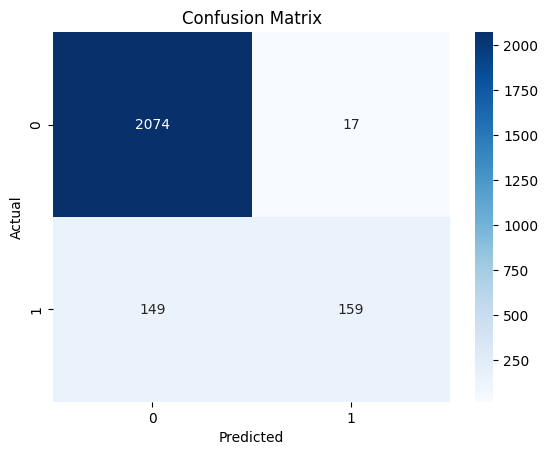

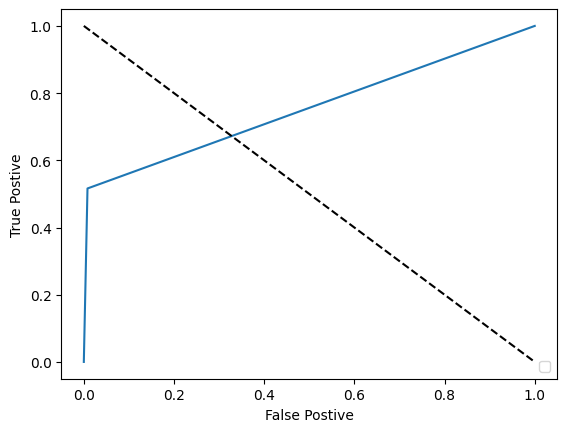

In [ ]:
print_metrics("SVM", "Z-Score normalization", y_test, y_pred_2)

### SVM with Grid Search CV

In [ ]:
parameters = {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'], 'kernel': ['linear', 'rbf', 'sigmoid']}

svm = SVC(kernel='rbf')
grid_svm = GridSearchCV(svm, param_grid=parameters)
grid_svm.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'sigmoid']})

In [ ]:
print('Best Parameters: ', grid_svm.best_params_)
best_param = grid_svm.best_params_

Best Parameters:  {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


Accuracy of SVM with GridSearchCV: 0.9320550229262192 (93.21%)

Error rate: 0.06794497707378078 (6.79%)

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      2091
           1       0.80      0.63      0.70       308

    accuracy                           0.93      2399
   macro avg       0.87      0.80      0.83      2399
weighted avg       0.93      0.93      0.93      2399



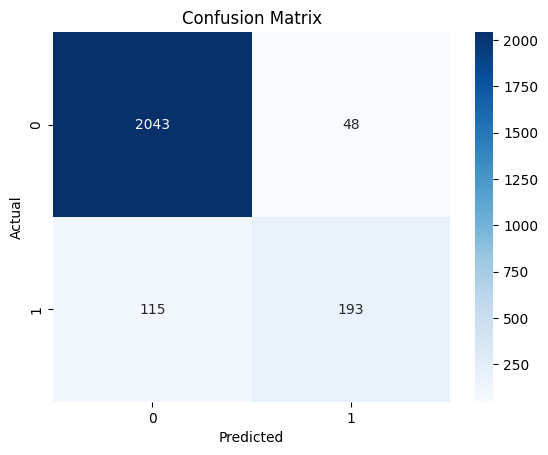

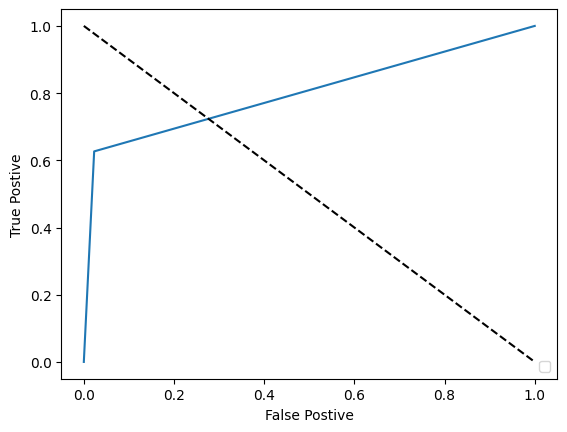

In [ ]:
# Predicting on testing data with new hyperparams
svm = SVC(kernel=best_param['kernel'], C=best_param['C'], gamma=best_param['gamma'])
svm.fit(X_train, y_train)
y_pred_5 = svm.predict(X_test)
print_metrics("SVM", "GridSearchCV", y_test, y_pred_5)

## Adaboost

### Adaboost with MinMax Norm

In [ ]:
adaboost = AdaBoostClassifier(n_estimators=150, random_state=42)

In [ ]:
X_train, X_test, y_train, y_test = split_data(water_quality_data_mm, columns)

In [ ]:
adaboost.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=150, random_state=42)

In [ ]:
y_pred_3 = adaboost.predict(X_test)

Accuracy of Adaboost with MinMax normalization: 0.9241350562734473 (92.41%)

Error rate: 0.07586494372655272 (7.59%)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      2091
           1       0.80      0.54      0.65       308

    accuracy                           0.92      2399
   macro avg       0.87      0.76      0.80      2399
weighted avg       0.92      0.92      0.92      2399



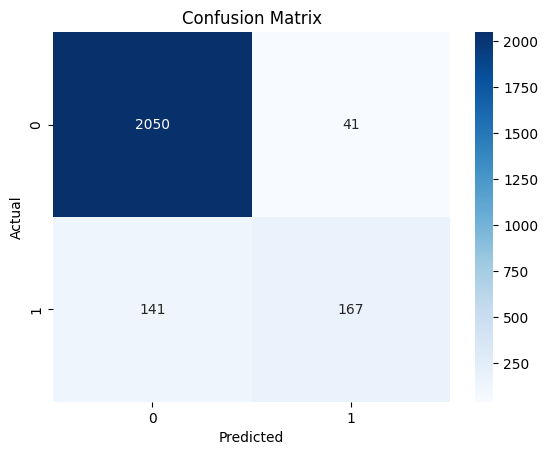

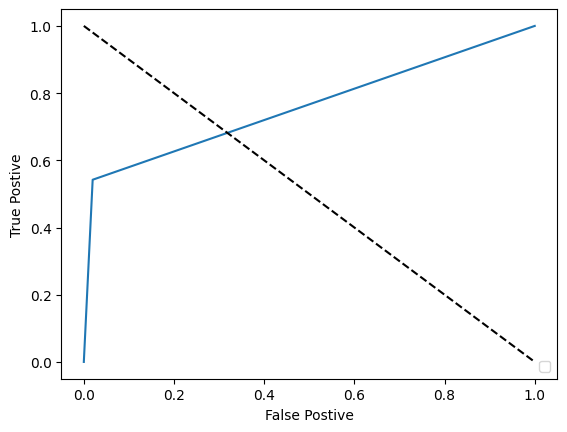

In [ ]:
print_metrics("Adaboost", "MinMax normalization", y_test, y_pred_3)

### Adaboost with Z-Score

In [ ]:
adaboost = AdaBoostClassifier(n_estimators=150, random_state=42)

In [ ]:
X_train, X_test, y_train, y_test = split_data(water_quality_data_z, columns)

In [ ]:
adaboost.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=150, random_state=42)

In [ ]:
y_pred_4 = adaboost.predict(X_test)

Accuracy of Adaboost with Z-Score normalization: 0.9241350562734473 (92.41%)

Error rate: 0.07586494372655272 (7.59%)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      2091
           1       0.80      0.54      0.65       308

    accuracy                           0.92      2399
   macro avg       0.87      0.76      0.80      2399
weighted avg       0.92      0.92      0.92      2399



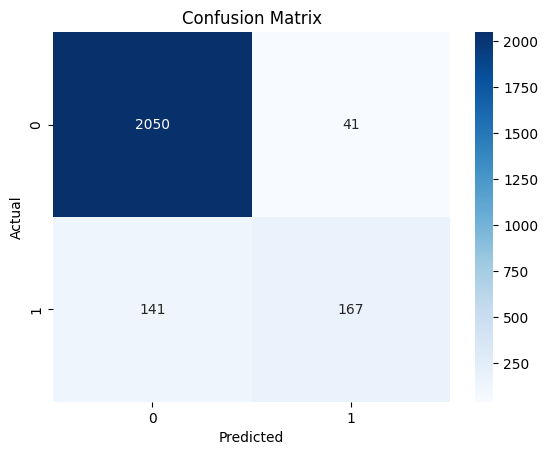

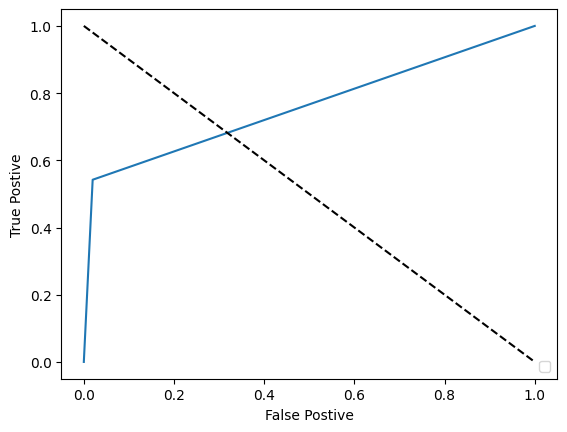

In [ ]:
print_metrics("Adaboost", "Z-Score normalization", y_test, y_pred_4)

## K-Nearest Neighbours (KNN)

### KNN with Minmax norm

Accuracy of KNN with MinMax normalization: 0.8841183826594414 (88.41%)

Error rate: 0.11588161734055857 (11.59%)

              precision    recall  f1-score   support

           0       0.90      0.97      0.94      2091
           1       0.59      0.31      0.41       308

    accuracy                           0.88      2399
   macro avg       0.75      0.64      0.67      2399
weighted avg       0.86      0.88      0.87      2399



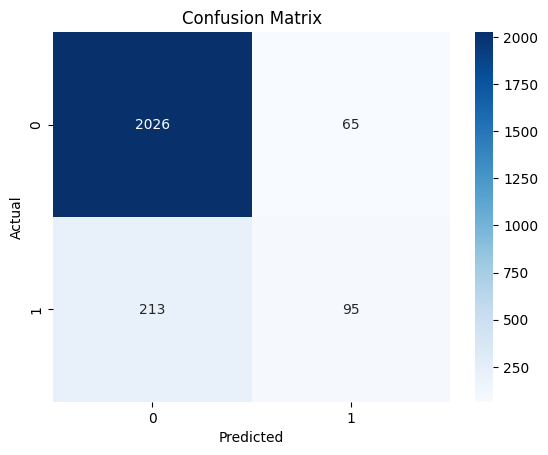

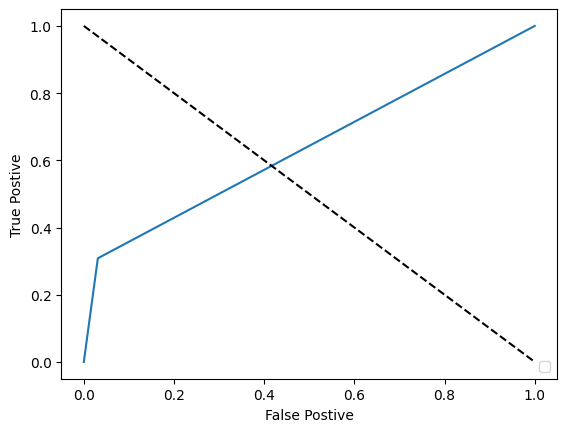

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
X_train, X_test, y_train, y_test = split_data(water_quality_data_mm, columns)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)*100
print_metrics("KNN", "MinMax normalization", y_test, y_pred)

### KNN with Z-score

Accuracy of KNN with Z-Score normalization: 0.8828678616090038 (88.29%)

Error rate: 0.11713213839099623 (11.71%)

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      2091
           1       0.58      0.33      0.42       308

    accuracy                           0.88      2399
   macro avg       0.74      0.65      0.68      2399
weighted avg       0.87      0.88      0.87      2399



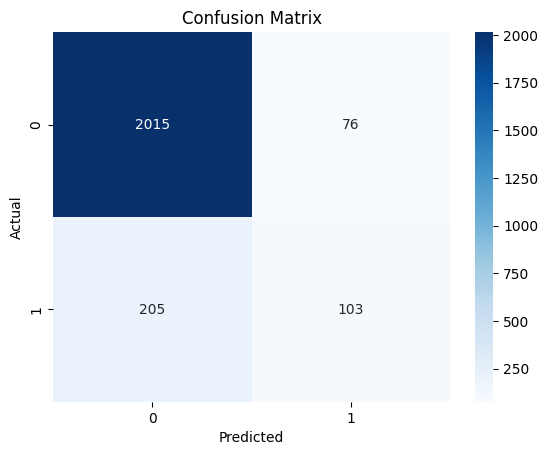

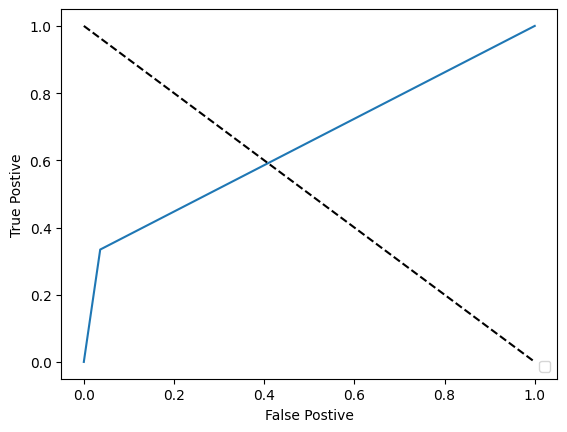

In [ ]:
X_train, X_test, y_train, y_test = split_data(water_quality_data_z, columns)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)*100
print_metrics("KNN", "Z-Score normalization", y_test, y_pred)

## Random forest with grid search CV

### with minmax norm

In [ ]:
X_train, X_test, y_train, y_test = split_data(water_quality_data_mm, columns)
rf_model=RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
n_estimators=[10, 17, 25, 33, 41, 48, 56, 64, 72, 80]
max_features=['auto','sqrt']
max_depth=[2,4,6]
param_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
}
print(param_grid)
rf_Grid=GridSearchCV(estimator= rf_model, param_grid=param_grid,cv=3,verbose=2,n_jobs=4)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4, 6]}


In [ ]:
rf_Grid.fit(X_train,y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'max_depth': [2, 4, 6],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [ ]:
print('Best Parameters')
print(rf_Grid.best_params_)

Best Parameters
{'max_depth': 6, 'max_features': 'auto', 'n_estimators': 80}


Accuracy of Radom Forrest with Grid Search CV with MinMax normalization: 0.9428928720300125 (94.29%)

Error rate: 0.057107127969987515 (5.71%)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2091
           1       0.96      0.58      0.72       308

    accuracy                           0.94      2399
   macro avg       0.95      0.79      0.85      2399
weighted avg       0.94      0.94      0.94      2399



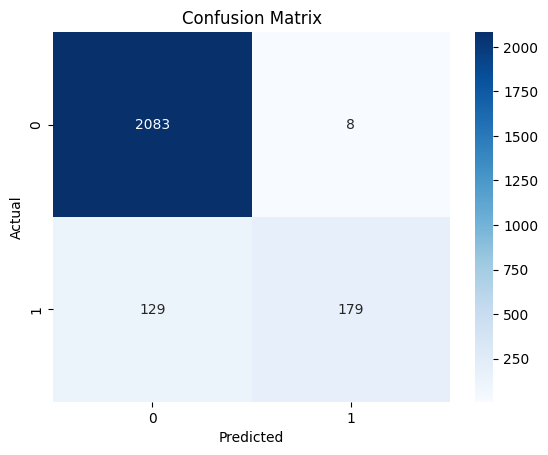

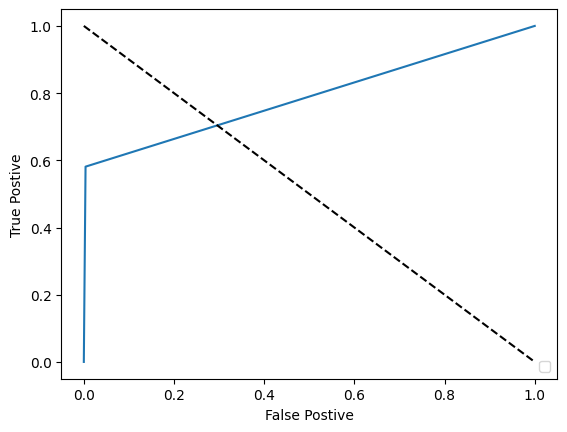

In [ ]:
y_pred_rf = rf_Grid.predict(X_test)
print_metrics("Radom Forrest with Grid Search CV", "MinMax normalization", y_test, y_pred_rf)

### with z-score

In [ ]:
X_train, X_test, y_train, y_test = split_data(water_quality_data_z, columns)
rf_model=RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
n_estimators=[10, 17, 25, 33, 41, 48, 56, 64, 72, 80]
max_features=['auto','sqrt']
max_depth=[2,4,6]
param_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
}
print(param_grid)
rf_Grid=GridSearchCV(estimator= rf_model, param_grid=param_grid,cv=3,verbose=2,n_jobs=4)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4, 6]}


In [ ]:
rf_Grid.fit(X_train,y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'max_depth': [2, 4, 6],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [ ]:
print('Best Parameters')
print(rf_Grid.best_params_)

Best Parameters
{'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 72}


Accuracy of Radom Forrest with Grid Search CV with Z-Score normalization: 0.9412255106294289 (94.12%)

Error rate: 0.05877448937057106 (5.88%)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2091
           1       0.95      0.57      0.71       308

    accuracy                           0.94      2399
   macro avg       0.95      0.78      0.84      2399
weighted avg       0.94      0.94      0.93      2399



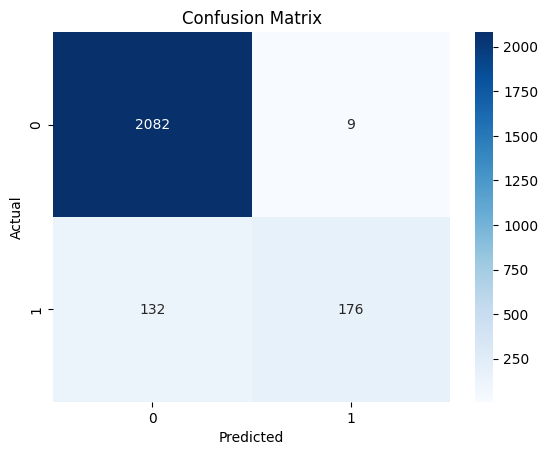

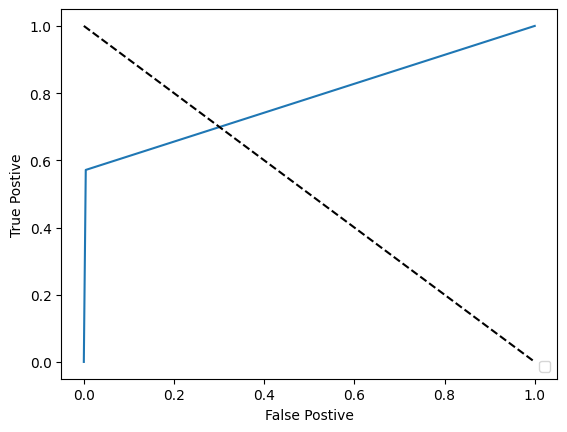

In [ ]:
y_pred_rf = rf_Grid.predict(X_test)
print_metrics("Radom Forrest with Grid Search CV", "Z-Score normalization", y_test, y_pred_rf)

### Decision tree with MinMax Norm

Accuracy of Decision Tree with MinMax normalization: 0.944977073780742 (94.50%)

Error rate: 0.05502292621925797 (5.50%)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2091
           1       0.78      0.79      0.79       308

    accuracy                           0.94      2399
   macro avg       0.88      0.88      0.88      2399
weighted avg       0.95      0.94      0.95      2399



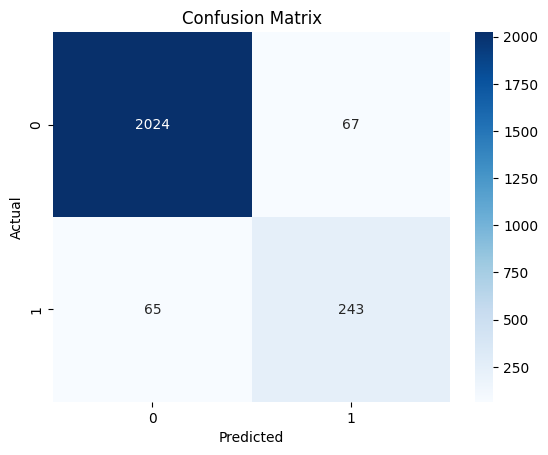

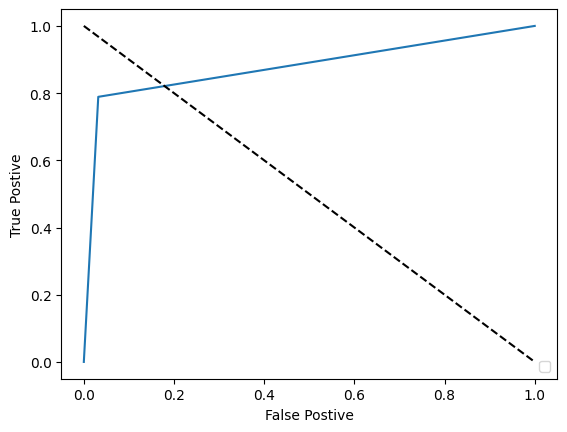

In [ ]:
decisionTreeModel = tree.DecisionTreeClassifier()
X_train, X_test, y_train, y_test = split_data(water_quality_data_mm, columns)
decisionTreeModel.fit(X_train, y_train)
decisionTree_y_pred = decisionTreeModel.predict(X_test)
accuracyDecisionTree = metrics.accuracy_score(y_test, decisionTree_y_pred)*100
print_metrics("Decision Tree", "MinMax normalization", y_test, decisionTree_y_pred)

### Decision tree with Z-score

Accuracy of Decision Tree with Z-Score normalization: 0.9428928720300125 (94.29%)

Error rate: 0.057107127969987515 (5.71%)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2091
           1       0.78      0.78      0.78       308

    accuracy                           0.94      2399
   macro avg       0.87      0.87      0.87      2399
weighted avg       0.94      0.94      0.94      2399



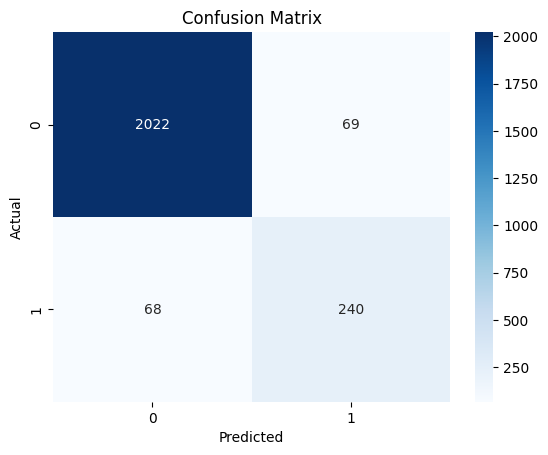

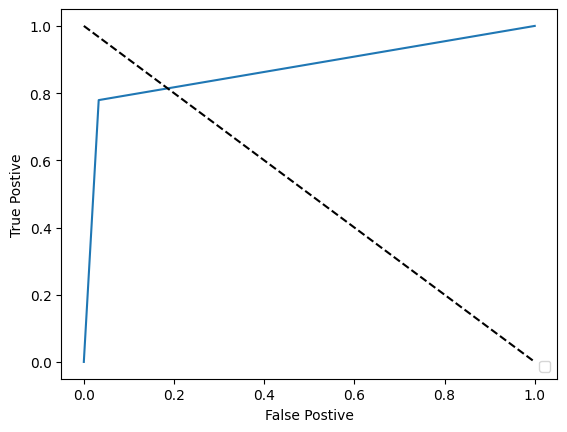

In [ ]:
decisionTreeModel_Z_Score = tree.DecisionTreeClassifier()
X_train, X_test, y_train, y_test = split_data(water_quality_data_z, columns)
decisionTreeModel_Z_Score.fit(X_train, y_train)
decisionTree_Z_Score_y_pred = decisionTreeModel_Z_Score.predict(X_test)
accuracyDecisionTree_Z_Score = metrics.accuracy_score(y_test, decisionTree_Z_Score_y_pred)*100
print_metrics("Decision Tree", "Z-Score normalization", y_test, decisionTree_Z_Score_y_pred)

## Bagging Along with Random Forest

### Bagging Along with Random Forest Classifier using MinMax Norm

Accuracy of Random Forest with MinMax normalization: 0.9303876615256357 (93.04%)

Error rate: 0.06961233847436432 (6.96%)

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      2091
           1       0.97      0.47      0.63       308

    accuracy                           0.93      2399
   macro avg       0.95      0.73      0.80      2399
weighted avg       0.93      0.93      0.92      2399



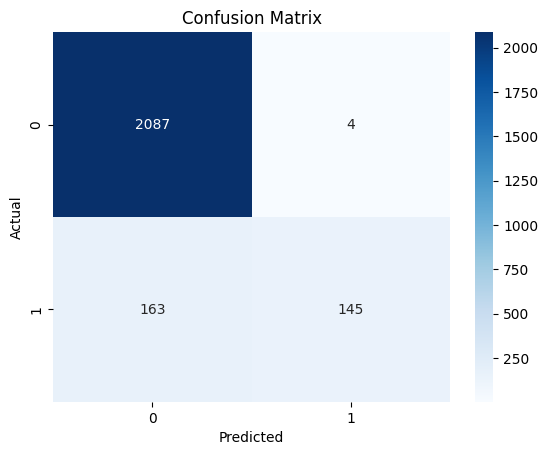

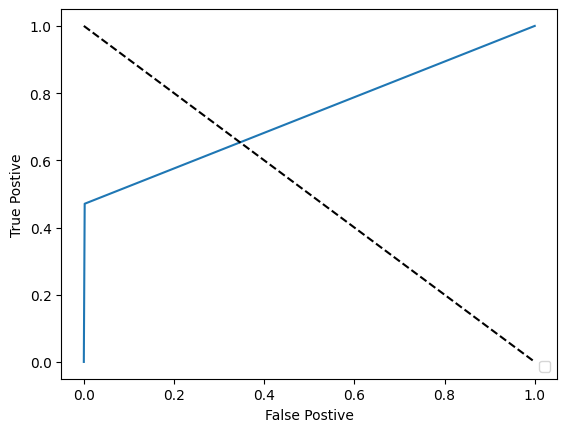

In [ ]:
randomForestClassifier = RandomForestClassifier(max_depth=5, random_state=42)
baggingClassifier = BaggingClassifier(base_estimator = randomForestClassifier, n_estimators = 10, random_state = 42)
X_train, X_test, y_train, y_test = split_data(water_quality_data_mm, columns)
baggingClassifier = baggingClassifier.fit(X_train, y_train)
Bagging_y_pred = baggingClassifier.predict(X_test)
accuracyBagging_MinMax = metrics.accuracy_score(y_test, Bagging_y_pred)*100
print_metrics("Random Forest", "MinMax normalization", y_test, Bagging_y_pred)

### Bagging along with Random Forest Classifier using Z Score

Accuracy of Random Forest with Z-Score normalization: 0.9299708211754898 (93.00%)

Error rate: 0.07002917882451021 (7.00%)

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      2091
           1       0.97      0.47      0.63       308

    accuracy                           0.93      2399
   macro avg       0.95      0.73      0.80      2399
weighted avg       0.93      0.93      0.92      2399



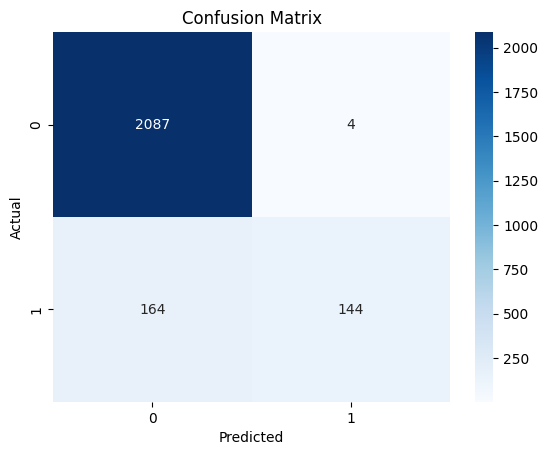

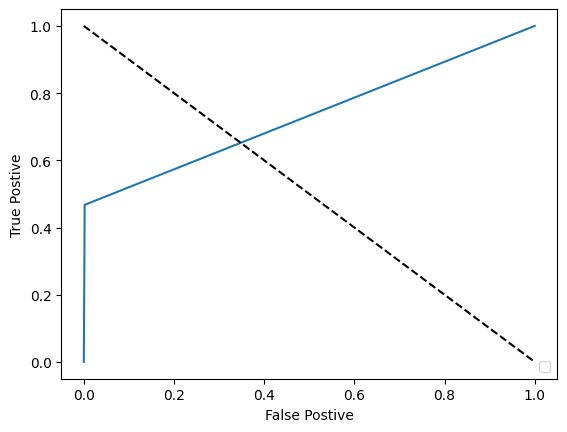

In [ ]:
X_train, X_test, y_train, y_test = split_data(water_quality_data_z, columns)
baggingClassifier_Z = baggingClassifier.fit(X_train, y_train)
Bagging_y_pred_Z = baggingClassifier.predict(X_test)
accuracyBagging_Z = metrics.accuracy_score(y_test, Bagging_y_pred_Z)*100
print_metrics("Random Forest", "Z-Score normalization", y_test, Bagging_y_pred_Z)

## Logistic Regression

### Logistic Regression with Minmax norm

Accuracy of Logistic Regression with MinMax normalization: 0.8828678616090038 (88.29%)

Error rate: 0.11713213839099623 (11.71%)

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      2091
           1       0.58      0.33      0.42       308

    accuracy                           0.88      2399
   macro avg       0.74      0.65      0.68      2399
weighted avg       0.87      0.88      0.87      2399



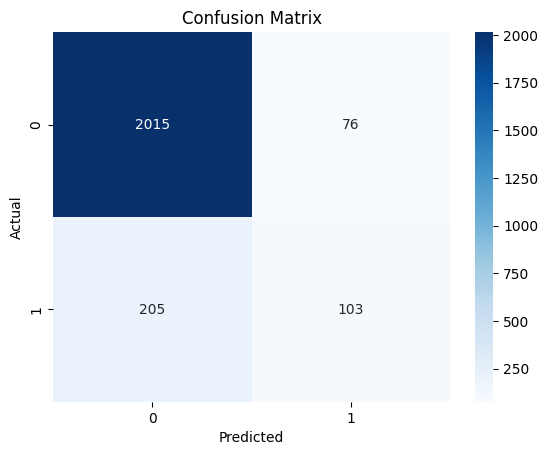

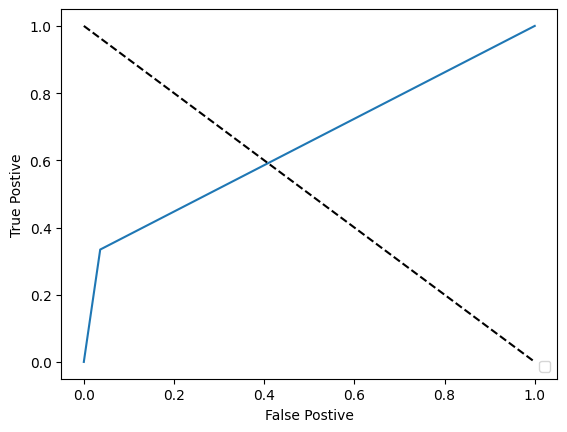

In [ ]:
X_train, X_test, y_train, y_test = split_data(water_quality_data_mm, columns)
logRegModel = LogisticRegression()
logRegModel.fit(X_train, y_train)
accuracy = metrics.accuracy_score(y_test, y_pred)*100
print_metrics("Logistic Regression", "MinMax normalization", y_test, y_pred)

### Logistic Regression with z-score

Accuracy of Logistic Regression with Z-Score normalization: 0.8828678616090038 (88.29%)

Error rate: 0.11713213839099623 (11.71%)

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      2091
           1       0.58      0.33      0.42       308

    accuracy                           0.88      2399
   macro avg       0.74      0.65      0.68      2399
weighted avg       0.87      0.88      0.87      2399



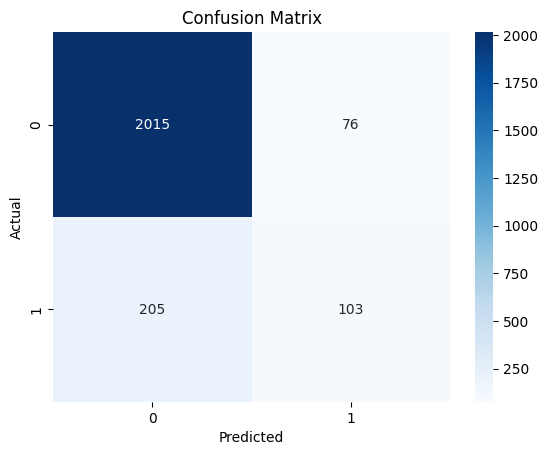

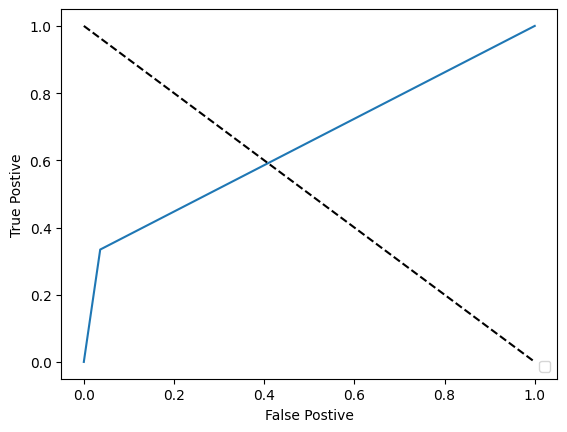

In [ ]:
X_train, X_test, y_train, y_test = split_data(water_quality_data_z, columns)
logRegModel = LogisticRegression()
logRegModel.fit(X_train, y_train)
accuracy = metrics.accuracy_score(y_test, y_pred)*100
print_metrics("Logistic Regression", "Z-Score normalization", y_test, y_pred)

### Grid Search CV for Logistic Regression

In [ ]:
# Define the hyperparameters to search
hyperparameters = {
    'tol': [0.01, 0.001, 0.1],
    'penalty': ['l1', 'l2', 'none'],
    'max_iter' : [100, 1000,2500, 5000]
}

In [ ]:
grid_search = GridSearchCV(logRegModel, hyperparameters, cv=5, verbose=True, n_jobs=-1)
a = grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [ ]:
best_logreg = grid_search.best_estimator_
best_logreg

LogisticRegression(tol=0.01)

Accuracy of Logistic Regression with with GridSearch CV: 0.8978741142142559 (89.79%)

Error rate: 0.10212588578574411 (10.21%)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      2091
           1       0.72      0.33      0.45       308

    accuracy                           0.90      2399
   macro avg       0.82      0.66      0.70      2399
weighted avg       0.88      0.90      0.88      2399



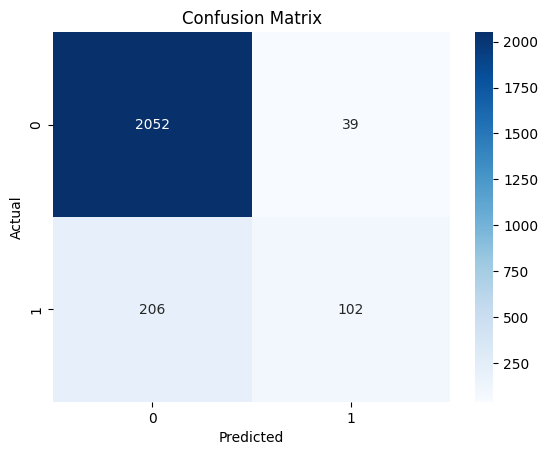

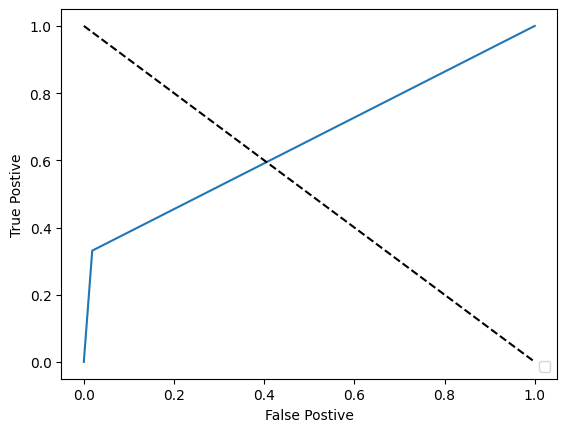

In [ ]:
y_pred = best_logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print_metrics("Logistic Regression", "with GridSearch CV", y_test, y_pred)

### Weighted Logistic Regression

In [ ]:
print("Ratio of Discrete labels")
water_quality_data["is_safe"].value_counts()/water_quality_data["is_safe"].shape[0]

Ratio of Discrete labels


is_safe
0    0.885943
1    0.114057
Name: count, dtype: float64

Accuracy of Weighted Logistic Regression with Z-Score normalization: 0.838682784493539 (83.87%)

Error rate: 0.16131721550646105 (16.13%)

              precision    recall  f1-score   support

           0       0.95      0.86      0.90      2091
           1       0.42      0.69      0.52       308

    accuracy                           0.84      2399
   macro avg       0.69      0.77      0.71      2399
weighted avg       0.88      0.84      0.85      2399



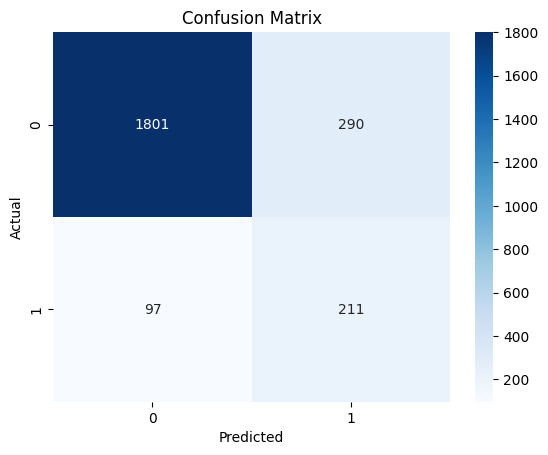

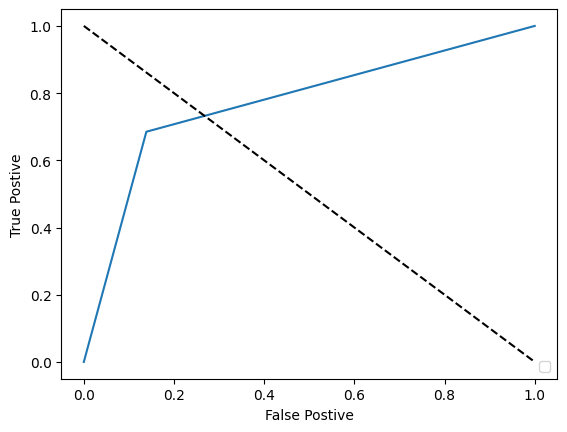

In [ ]:
X_train, X_test, y_train, y_test = split_data(water_quality_data_z, columns)
weights = {0: 14, 1: 86}
logmodel = LogisticRegression(class_weight=weights)
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)
accuracy = metrics.accuracy_score(y_test, predictions)*100
print_metrics("Weighted Logistic Regression", "Z-Score normalization", y_test, predictions)

* As you can see after using the weighted logistic regression the accuracy is brought down to 86% from 90%.
* However, the model is trained better for both True and False Labels

## Gradient Boosting

### Gradient Boosting with Min Max Normalized Data

In [ ]:
X_train, X_test, y_train, y_test = split_data(water_quality_data_mm, columns)
model1 = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100, max_depth=3, random_state=42,
                                        min_samples_split=2, min_samples_leaf=1, subsample=1.0, max_features=None,
                                        validation_fraction=0.1, n_iter_no_change=None, tol=0.0001)
model1.fit(X_train, y_train)

GradientBoostingClassifier(loss='deviance', random_state=42)

Accuracy of Gradient Boosting with MinMax normalization: 0.9558149228845352 (95.58%)

Error rate: 0.04418507711546482 (4.42%)

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      2091
           1       0.92      0.71      0.81       308

    accuracy                           0.96      2399
   macro avg       0.94      0.85      0.89      2399
weighted avg       0.95      0.96      0.95      2399



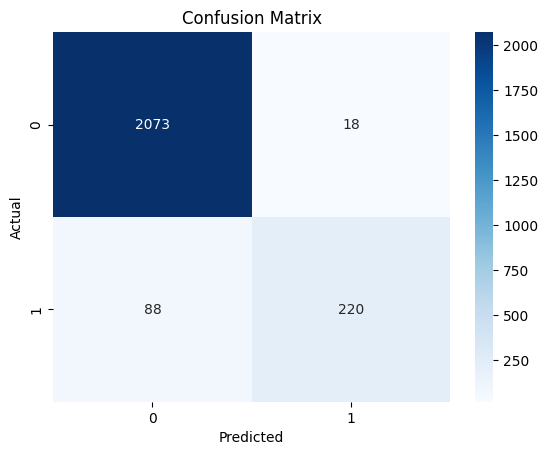

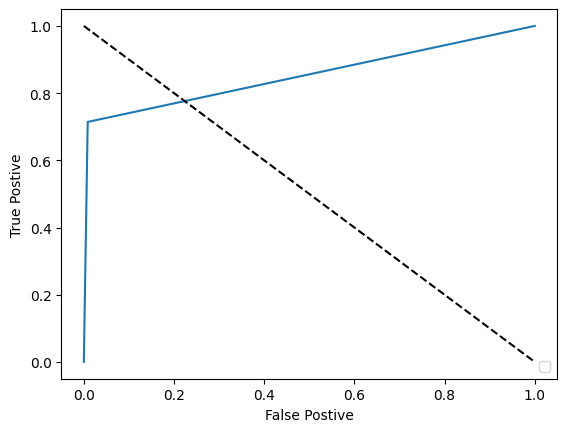

In [ ]:
y_pred = model1.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print_metrics("Gradient Boosting", "MinMax normalization", y_test, y_pred)

### Gradient Boosting with Min Max Z-Score Normalized data

In [ ]:
X_train, X_test, y_train, y_test = split_data(water_quality_data_z, columns)
model1 = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100, max_depth=3, random_state=42,
                                        min_samples_split=2, min_samples_leaf=1, subsample=1.0, max_features=None,
                                        validation_fraction=0.1, n_iter_no_change=None, tol=0.0001)
model1.fit(X_train, y_train)

GradientBoostingClassifier(loss='deviance', random_state=42)

Accuracy of Gradient Boosting with Z-Score normalization: 0.9558149228845352 (95.58%)

Error rate: 0.04418507711546482 (4.42%)

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      2091
           1       0.92      0.71      0.81       308

    accuracy                           0.96      2399
   macro avg       0.94      0.85      0.89      2399
weighted avg       0.95      0.96      0.95      2399



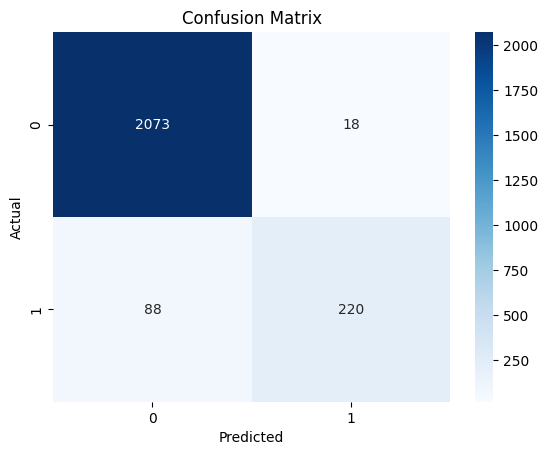

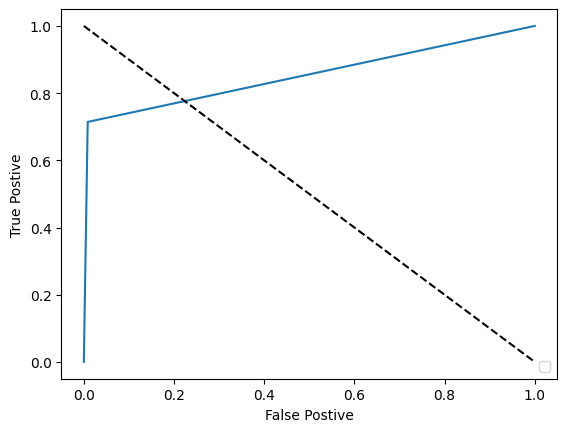

In [ ]:
y_pred = model1.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print_metrics("Gradient Boosting", "Z-Score normalization", y_test, y_pred)

### Hyperparameter tuning

In [ ]:
param_grid = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7]
}

In [ ]:
grid_search = GridSearchCV(model1, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(loss='deviance',
                                                  random_state=42),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]})

Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
Accuracy of Gradient Boosting with Grid Search CV: 0.9658190912880367 (96.58%)

Error rate: 0.03418090871196333 (3.42%)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2091
           1       0.94      0.78      0.85       308

    accuracy                           0.97      2399
   macro avg       0.96      0.89      0.92      2399
weighted avg       0.97      0.97      0.96      2399



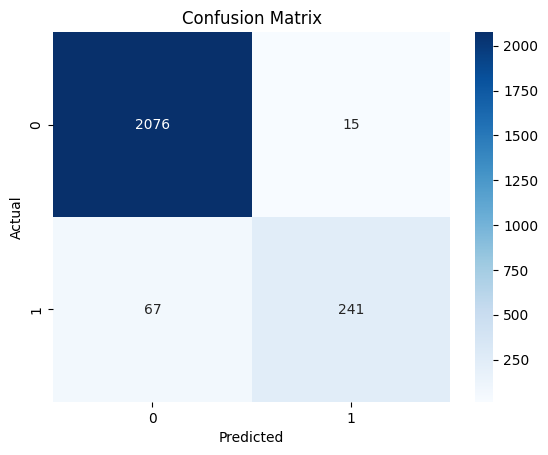

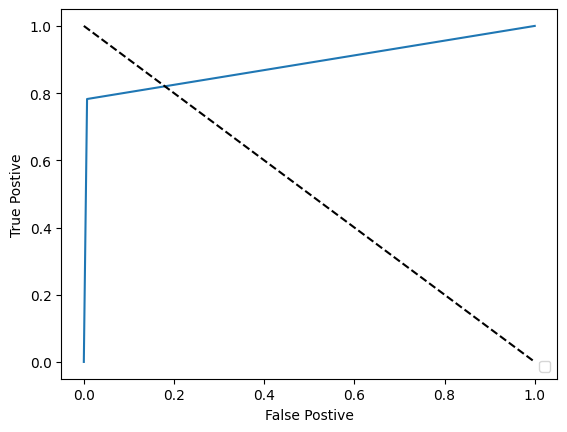

In [ ]:
print("Best hyperparameters:", grid_search.best_params_)

best_param_gb = grid_search.best_params_

y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print_metrics("Gradient Boosting", "Grid Search CV", y_test, y_pred)

## Tricks to tackle baised data

1. SMOTE with SVM
2. SMOTE with ANN
3. SMOTE with Gradient Boosting


### SVM

In [ ]:

smote = SMOTE(random_state=45)

X_train, X_test, y_train, y_test = split_data(water_quality_data_z, columns)
new_X_train, new_y_train = smote.fit_resample(X_train, y_train)

In [ ]:
svm = SVC(kernel='rbf')

Accuracy of SVM with SMOTE with Z-Score normalization: 0.9228845352230096 (92.29%)

Error rate: 0.07711546477699038 (7.71%)

              precision    recall  f1-score   support

           0       0.97      0.94      0.96      2091
           1       0.66      0.81      0.73       308

    accuracy                           0.92      2399
   macro avg       0.82      0.87      0.84      2399
weighted avg       0.93      0.92      0.93      2399



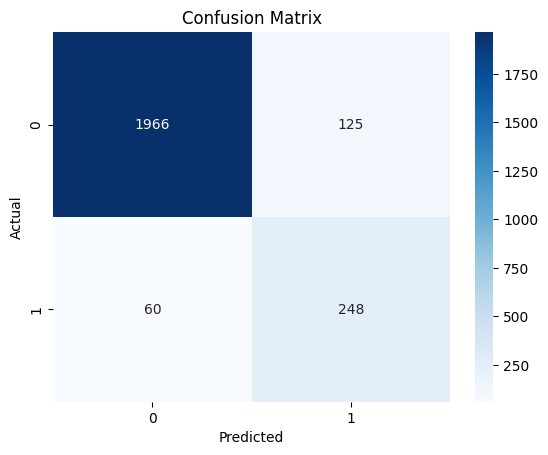

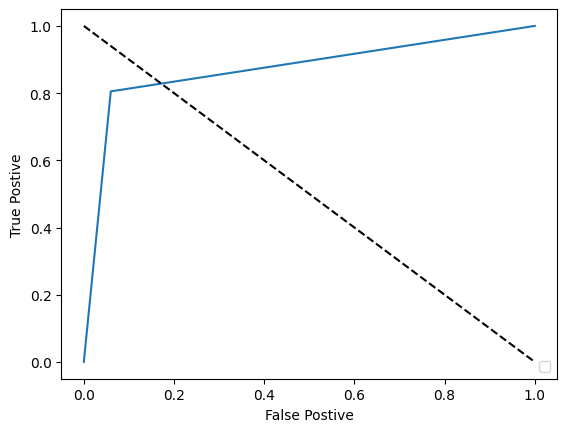

In [ ]:
svm.fit(new_X_train, new_y_train)
y_pred_6 = svm.predict(X_test)

print_metrics("SVM with SMOTE", "Z-Score normalization", y_test, y_pred_6)

### Artificial Nueral Networks

In [ ]:
clf = MLPClassifier(random_state=42, max_iter=950, hidden_layer_sizes=(100), learning_rate='adaptive', learning_rate_init=0.0001)

# On smote data

X_train, X_test, y_train, y_test = split_data(water_quality_data_z, columns)
new_X_train, new_y_train = smote.fit_resample(X_train, y_train)

In [ ]:
clf.fit(new_X_train, new_y_train)

MLPClassifier(hidden_layer_sizes=100, learning_rate='adaptive',
              learning_rate_init=0.0001, max_iter=950, random_state=42)

Accuracy of ANN with SMOTE  with Z-Score normalization: 0.9362234264276782 (93.62%)

Error rate: 0.0637765735723218 (6.38%)

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      2091
           1       0.72      0.81      0.77       308

    accuracy                           0.94      2399
   macro avg       0.85      0.88      0.86      2399
weighted avg       0.94      0.94      0.94      2399



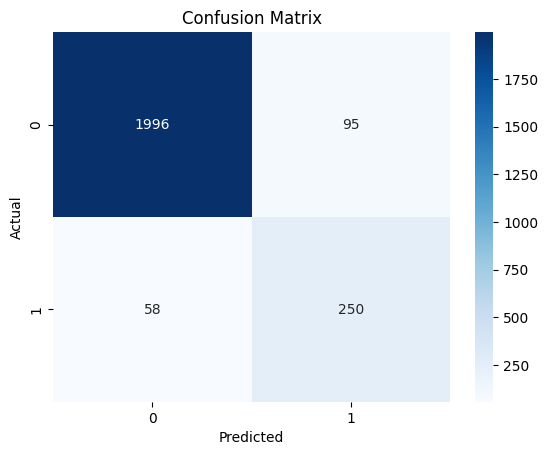

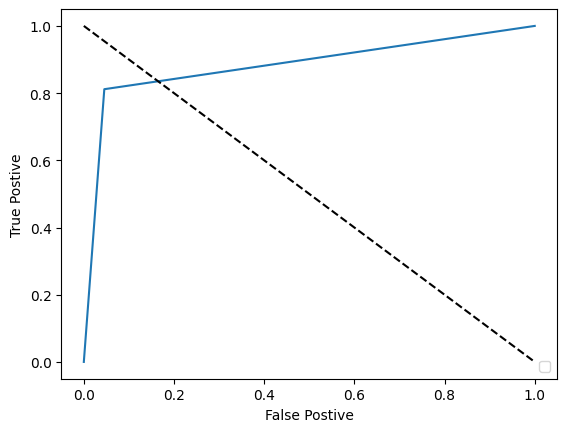

In [ ]:
y_pred_clf = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print_metrics("ANN with SMOTE ", "Z-Score normalization", y_test, y_pred_clf)

### Gradient Boosting


In [ ]:
model_gb = GradientBoostingClassifier(loss='deviance', learning_rate=best_param_gb['learning_rate'], n_estimators=best_param_gb['n_estimators'], max_depth=best_param_gb['max_depth'], random_state=42,
                                        min_samples_split=2, min_samples_leaf=1, subsample=1.0, max_features=None,
                                        validation_fraction=0.1, n_iter_no_change=None, tol=0.0001)

# On smote data
X_train, X_test, y_train, y_test = split_data(water_quality_data_z, columns)
new_X_train, new_y_train = smote.fit_resample(X_train, y_train)

In [ ]:
model_gb.fit(new_X_train, new_y_train)


GradientBoostingClassifier(loss='deviance', max_depth=7, n_estimators=200,
                           random_state=42)

Accuracy of ANN with SMOTE  with Z-Score normalization: 0.9616506877865777 (96.17%)

Error rate: 0.038349312213422304 (3.83%)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2091
           1       0.86      0.84      0.85       308

    accuracy                           0.96      2399
   macro avg       0.92      0.91      0.91      2399
weighted avg       0.96      0.96      0.96      2399



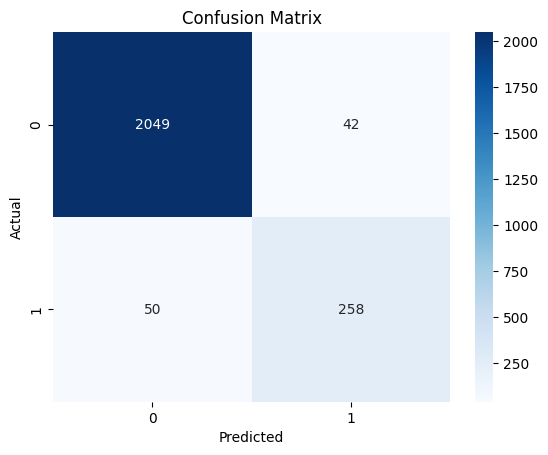

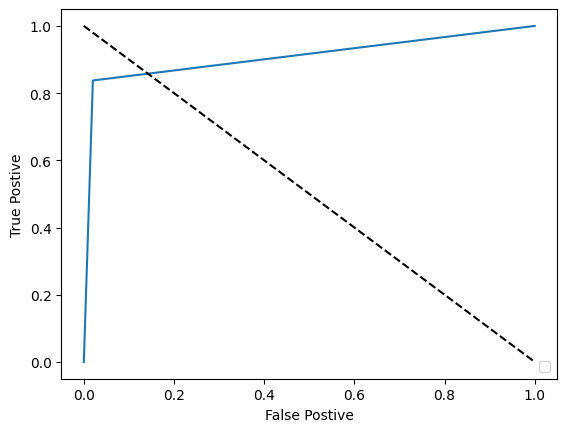

In [ ]:
y_pred_gb = model_gb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_gb)
print_metrics("ANN with SMOTE ", "Z-Score normalization", y_test, y_pred_gb)